In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 6
dim = 30
numRuns = 51
pop_size = 300
percMaxEvals = 0.9
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[6_30_51_300_0.9_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[6_30_51_300_0.9_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	607.3481

Best Fitness:	605.9287
Solution:	600.0000
Diff:		5.9287

[0:37:17][----------] 1.96% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	605.4538

Best Fitness:	603.9990
Solution:	600.0000
Diff:		3.9990

[1:11:35][----------] 3.92% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	603.5124

Best Fitness:	602.8584
Solution:	600.0000
Diff:		2.8584

[1:46:23][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	607.5297

Best Fitness:	605.9683
Solution:	600.0000
Diff:		5.9683

[2:20:09][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	617.0575

Best Fitness:	614.4113
Solution:	600.0000
Diff:		14.4113

[2:52:44][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	610.3759

Best Fitness:	608.3722
Solution:	600.0000
Diff:		8.3722

[3:23:07][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	606.2889

Best Fitness:	605.3828
Solution:	600.0000
Diff:		5.3828

[3:53:14][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	608.1706

Best Fitness:	606.7047
Solution:	600.0000
Diff:		6.7047

[4:23:10][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	616.7427

Best Fitness:	612.7735
Solution:	600.0000
Diff:		12.7735

[4:53:12][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	607.4335

Best Fitness:	605.3321
Solution:	600.0000
Diff:		5.3321

[5:23:32][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	604.4535

Best Fitness:	603.3974
Solution:	600.0000
Diff:		3.3974

[5:51:49][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	608.1886

Best Fitness:	606.1653
Solution:	600.0000
Diff:		6.1653

[6:18:33][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	610.6808

Best Fitness:	608.8229
Solution:	600.0000
Diff:		8.8229

[6:45:49][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	610.7335

Best Fitness:	608.2303
Solution:	600.0000
Diff:		8.2303

[7:12:41][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	605.4445

Best Fitness:	604.3507
Solution:	600.0000
Diff:		4.3507

[7:39:39][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	604.3606

Best Fitness:	603.4179
Solution:	600.0000
Diff:		3.4179

[8:05:53][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	617.3220

Best Fitness:	613.6251
Solution:	600.0000
Diff:		13.6251

[8:31:09][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	606.8660

Best Fitness:	605.5608
Solution:	600.0000
Diff:		5.5608

[8:54:04][####------] 35.29% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	607.6050

Best Fitness:	606.2414
Solution:	600.0000
Diff:		6.2414

[9:17:23][####------] 37.25% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	609.4395

Best Fitness:	607.7110
Solution:	600.0000
Diff:		7.7110

[9:41:33][####------] 39.22% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	604.3742

Best Fitness:	603.3608
Solution:	600.0000
Diff:		3.3608

[10:05:15][####------] 41.18% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	604.6331

Best Fitness:	603.7291
Solution:	600.0000
Diff:		3.7291

[10:28:28][####------] 43.14% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	604.4822

Best Fitness:	603.0222
Solution:	600.0000
Diff:		3.0222

[10:51:14][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	612.8906

Best Fitness:	609.9297
Solution:	600.0000
Diff:		9.9297

[11:13:19][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	609.3443

Best Fitness:	607.2558
Solution:	600.0000
Diff:		7.2558

[11:34:26][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	603.4620

Best Fitness:	602.6501
Solution:	600.0000
Diff:		2.6501

[11:55:03][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	609.6246

Best Fitness:	608.0591
Solution:	600.0000
Diff:		8.0591

[12:15:09][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	603.5899

Best Fitness:	602.8474
Solution:	600.0000
Diff:		2.8474

[12:35:13][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	614.2943

Best Fitness:	611.3197
Solution:	600.0000
Diff:		11.3197

[12:52:37][######----] 56.86% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	606.1809

Best Fitness:	604.9831
Solution:	600.0000
Diff:		4.9831

[13:09:57][######----] 58.82% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	603.2908

Best Fitness:	602.6468
Solution:	600.0000
Diff:		2.6468

[13:26:54][######----] 60.78% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	605.4961

Best Fitness:	604.2759
Solution:	600.0000
Diff:		4.2759

[13:43:28][######----] 62.75% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	605.9506

Best Fitness:	604.9856
Solution:	600.0000
Diff:		4.9856

[13:58:36][######----] 64.71% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	604.7718

Best Fitness:	603.9112
Solution:	600.0000
Diff:		3.9112

[14:13:03][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	607.4689

Best Fitness:	606.0272
Solution:	600.0000
Diff:		6.0272

[14:26:22][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	608.4644

Best Fitness:	606.7861
Solution:	600.0000
Diff:		6.7861

[14:39:32][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	608.7641

Best Fitness:	607.0963
Solution:	600.0000
Diff:		7.0963

[14:52:45][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	605.9567

Best Fitness:	604.9604
Solution:	600.0000
Diff:		4.9604

[15:05:41][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	607.9312

Best Fitness:	606.6822
Solution:	600.0000
Diff:		6.6822

[15:17:32][########--] 76.47% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	620.6320

Best Fitness:	616.0498
Solution:	600.0000
Diff:		16.0498

[15:28:19][########--] 78.43% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	606.2066

Best Fitness:	605.1018
Solution:	600.0000
Diff:		5.1018

[15:38:34][########--] 80.39% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	605.9101

Best Fitness:	604.9734
Solution:	600.0000
Diff:		4.9734

[15:49:53][########--] 82.35% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	617.7737

Best Fitness:	614.1458
Solution:	600.0000
Diff:		14.1458

[15:59:56][########--] 84.31% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	604.9577

Best Fitness:	604.0354
Solution:	600.0000
Diff:		4.0354

[16:09:05][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	606.5778

Best Fitness:	604.8328
Solution:	600.0000
Diff:		4.8328

[16:18:13][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	604.3864

Best Fitness:	603.5988
Solution:	600.0000
Diff:		3.5988

[16:27:15][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	604.2589

Best Fitness:	603.5452
Solution:	600.0000
Diff:		3.5452

[16:35:24][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	610.8402

Best Fitness:	609.1390
Solution:	600.0000
Diff:		9.1390

[16:43:31][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	605.3114

Best Fitness:	604.2070
Solution:	600.0000
Diff:		4.2070

[16:50:59][##########] 96.08% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	606.9469

Best Fitness:	605.3195
Solution:	600.0000
Diff:		5.3195

[16:58:11][##########] 98.04% 

Optimization ended due to max fitness evals (max = 270000.0, curr = 269400)


#Generations:	896

#FitnessEvals:	269400

Mean Fitness:	605.5388

Best Fitness:	604.2728
Solution:	600.0000
Diff:		4.2728

[17:05:44][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

17:05:44

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
891,5.67728,5.632949,5.253001,5.774297,5.727965,5.103262,5.618208,5.888068,5.753851,6.076541,...,4.55649,5.139978,5.354247,5.461050,5.830173,6.373421,6.006462,5.720014,5.715981,50
892,5.67728,5.632949,5.253001,5.774297,5.727965,5.103262,5.618208,5.340913,5.753851,6.076541,...,4.55649,5.139978,5.354247,5.461050,5.830173,6.373421,6.006462,5.720014,5.715981,50
893,5.67728,4.726909,5.253001,5.774297,5.727965,5.103262,5.618208,5.340913,5.753851,6.076541,...,4.55649,5.139978,5.354247,5.461050,5.830173,6.373421,6.006462,5.720014,5.715981,50
894,5.67728,4.726909,5.253001,5.774297,5.727965,5.103262,5.618208,5.340913,5.753851,6.076541,...,4.55649,5.139978,5.354247,4.640493,5.830173,5.801928,6.006462,5.720014,5.715981,50
895,5.67728,4.726909,5.253001,5.774297,5.727965,5.103262,5.618208,5.340913,5.753851,6.076541,...,4.55649,5.139978,5.354247,4.640493,5.830173,5.801928,6.006462,5.720014,5.715981,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 5.928661248949993

Best error for run 1: 3.9989515623802845

Best error for run 2: 2.8583942100872264

Best error for run 3: 5.968334864313647

Best error for run 4: 14.411331914078232

Best error for run 5: 8.372179595495936

Best error for run 6: 5.382753259502238

Best error for run 7: 6.704746774800697

Best error for run 8: 12.773485500073775

Best error for run 9: 5.332061877076399

Best error for run 10: 3.3973871929445068

Best error for run 11: 6.1652671845753275

Best error for run 12: 8.822858326083065

Best error for run 13: 8.230264522749621

Best error for run 14: 4.350694449783418

Best error for run 15: 3.417925907824838

Best error for run 16: 13.625119487271377

Best error for run 17: 5.5608391037479805

Best error for run 18: 6.241414204582725

Best error for run 19: 7.710961896667413

Best error for run 20: 3.360761118471828

Best error for run 21: 3.7291325735815235

Best error for run 22: 3.022215333725285

Best error for run 23: 9.929700928676425

Best error for run 24: 7.255812203888581

Best error for run 25: 2.6500999369609417

Best error for run 26: 8.059066224505045

Best error for run 27: 2.847413723193881

Best error for run 28: 11.319722692047776

Best error for run 29: 4.983135452517445

Best error for run 30: 2.6468443876497076

Best error for run 31: 4.275901976461569

Best error for run 32: 4.985567930728848

Best error for run 33: 3.9111575353670105

Best error for run 34: 6.027160193734744

Best error for run 35: 6.78610108503176

Best error for run 36: 7.096294587888906

Best error for run 37: 4.960372390754856

Best error for run 38: 6.6822020564837885

Best error for run 39: 16.049776663728153

Best error for run 40: 5.1017605810476425

Best error for run 41: 4.9733985687011

Best error for run 42: 14.145837911719354

Best error for run 43: 4.035419721698759

Best error for run 44: 4.832807232842356

Best error for run 45: 3.5988069236288993

Best error for run 46: 3.545157717899201

Best error for run 47: 9.138992242066706

Best error for run 48: 4.206979998731185

Best error for run 49: 5.319530163668787

Best error for run 50: 4.272809579579416

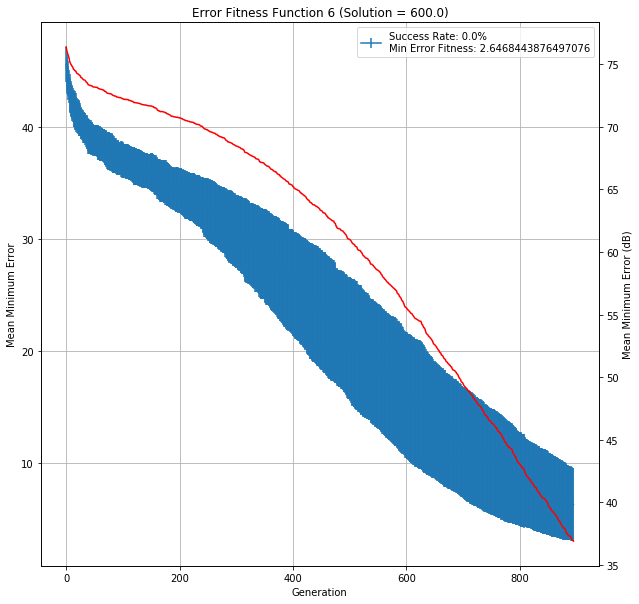

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[6_30_51_300_0.9_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,6,30,0.9,5.928661,3.998952,2.858394,5.968335,14.411332,8.37218,...,4.832807,3.598807,3.545158,9.138992,4.20698,5.31953,4.27281,6.333403,17:05:44,269400
